In [77]:
import numpy as np
import pylab as plt
import networkx as nx
import pandas as pd

In [78]:
edge_list = [(0,2),(0,1),(0,3),(2,4),(5,6),(7,4),(0,6),(5,3),(3,7),(0,8)]

In [79]:
goal = 7

In [80]:
G = nx.Graph()
G.add_edges_from(edge_list)

In [81]:
position = nx.spring_layout(G)

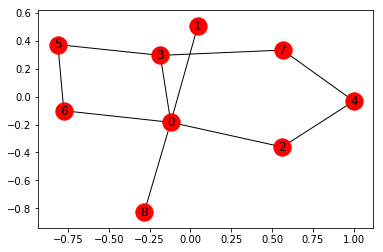

In [83]:
nx.draw_networkx_nodes(G, position)
nx.draw_networkx_edges(G, position)
nx.draw_networkx_labels(G, position)
plt.show()

In [84]:
SIZE_MATRIX = 9

In [85]:
R = np.matrix(np.ones(shape=(SIZE_MATRIX,SIZE_MATRIX)))
R *= -1

In [86]:
R

matrix([[-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.],
        [-1., -1., -1., -1., -1., -1., -1., -1., -1.]])

In [87]:
for edge in edge_list:
    print(edge)
    if edge[1] == goal:
        R[edge] = 100
    else:
        R[edge] = 0
    if edge[0] == goal:
        R[edge[::-1]] = 100
    else:
        R[edge[::-1]] = 0

(0, 2)
(0, 1)
(0, 3)
(2, 4)
(5, 6)
(7, 4)
(0, 6)
(5, 3)
(3, 7)
(0, 8)


In [88]:
R[goal,goal] = 100

In [91]:
R

matrix([[ -1.,   0.,   0.,   0.,  -1.,  -1.,   0.,  -1.,   0.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1., 100.,  -1.],
        [ -1.,  -1.,   0.,  -1.,  -1.,  -1.,  -1., 100.,  -1.],
        [ -1.,  -1.,  -1.,   0.,  -1.,  -1.,   0.,  -1.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,   0.,  -1.,  -1.,  -1.],
        [ -1.,  -1.,  -1.,   0.,   0.,  -1.,  -1., 100.,  -1.],
        [  0.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.,  -1.]])

In [92]:
gamma = 0.8

In [93]:
Q = np.matrix(np.zeros(shape=(SIZE_MATRIX,SIZE_MATRIX)))

In [94]:
pd.DataFrame(Q)

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [34]:
def get_available_actions(state):
    current_state_row = R[state,]
    available_actions = np.where(current_state_row >= 0)[1]
    
    return available_actions

In [48]:
def sample_next_action(available_actions):
    next_action = int(np.random.choice(available_actions, size=1))
    return next_action

In [63]:
def update(current_state, action, gamma):
    max_index = np.where(Q[action,] == np.max(Q[action,]))[1]
    print('max_index', max_index.shape)
    
    if max_index.shape[0] > 1:
        max_index = int(np.random.choice(max_index, size=1))
    else:
        max_index = int(max_index)
    
    max_value = Q[action, max_index]
    
    Q[current_state, action] = R[current_state, action] + gamma*max_value
    
    print('max_value', R[current_state, action] + gamma*max_value)

In [110]:
initial_state = 0

In [111]:
available_actions = get_available_actions(initial_state)

In [112]:
print(available_actions)

[1 2 3 6 8]


In [113]:
action = sample_next_action(available_actions)

In [114]:
print(action)

3


In [115]:
update(initial_state, action, gamma)

max_index (9,)
max_value 0.0


In [71]:
for i in range(700):
    current_state = np.random.randint(0, int(Q.shape[0]))
    
    available_action = get_available_actions(current_state)
    action = sample_next_action(available_action)
    
    update(current_state, action, gamma)

max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 100.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 80.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 64.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 64.0
max_index (1,)
max_value 180.0
max_index (9,)
max_value 0.0
max_index (9,)
max_value 0.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 64.0
max_index (1,)
max_value 51.2
max_index (1,)
max_value 144.0
max_index (1,)
max_value 

max_index (1,)
max_value 387.4743635363759
max_index (1,)
max_value 309.97949082910077
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 309.97949082910077
max_index (1,)
max_value 361.7747910656001
max_index (1,)
max_value 387.4743635363759
max_index (1,)
max_value 231.53586628198406
max_index (1,)
max_value 309.97949082910077
max_index (1,)
max_value 289.41983285248006
max_index (2,)
max_value 231.53586628198406
max_index (1,)
max_value 289.41983285248006
max_index (2,)
max_value 231.53586628198406
max_index (1,)
max_value 231.53586628198406
max_index (1,)
max_value 387.4743635363759
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 361.7747910656001
max_index (1,)
max_value 289.41983285248006
max_index (1,)
max_value 361.77479106

max_index (1,)
max_value 318.65507002567887
max_index (1,)
max_value 254.9240560205431
max_index (1,)
max_value 398.65507002567887
max_index (1,)
max_value 318.9240560205431
max_index (1,)
max_value 318.9240560205431
max_index (1,)
max_value 254.9240560205431
max_index (1,)
max_value 318.9240560205431
max_index (1,)
max_value 498.31883753209854
max_index (1,)
max_value 318.65507002567887


In [72]:
print('Trained Q matrix:')
pd.DataFrame(Q)

Trained Q matrix


,0,1,2,3,4,5,6,7,8
0,0.000000,254.924056,318.924056,398.318838,0.000000,0.00000,254.655070,0.000000,254.65507
1,318.655070,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
2,318.655070,0.000000,0.000000,0.000000,398.655070,0.00000,0.000000,0.000000,0.00000
3,318.318838,0.000000,0.000000,0.000000,0.000000,316.71648,0.000000,498.318838,0.00000
4,0.000000,0.000000,318.924056,0.000000,0.000000,0.00000,0.000000,498.318838,0.00000
5,0.000000,0.000000,0.000000,398.318838,0.000000,0.00000,254.924056,0.000000,0.00000
6,318.655070,0.000000,0.000000,0.000000,0.000000,318.65507,0.000000,0.000000,0.00000
7,0.000000,0.000000,0.000000,398.318838,397.898547,0.00000,0.000000,497.898547,0.00000
8,318.655070,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000


In [73]:
print('Normalized Q matrix:')
pd.DataFrame(Q/np.max(Q)*100)

Normalized Q matrix:


,0,1,2,3,4,5,6,7,8
0,0.000000,51.156817,64.0,79.932527,0.000000,0.000000,51.102838,0.000000,51.102838
1,63.946021,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,63.946021,0.000000,0.0,0.000000,80.000000,0.000000,0.000000,0.000000,0.000000
3,63.878548,0.000000,0.0,0.000000,0.000000,63.556995,0.000000,100.000000,0.000000
4,0.000000,0.000000,64.0,0.000000,0.000000,0.000000,0.000000,100.000000,0.000000
5,0.000000,0.000000,0.0,79.932527,0.000000,0.000000,51.156817,0.000000,0.000000
6,63.946021,0.000000,0.0,0.000000,0.000000,63.946021,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.0,79.932527,79.848185,0.000000,0.000000,99.915658,0.000000
8,63.946021,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [74]:
current_state = 0
steps = [current_state]

In [116]:
while current_state != goal:
    next_step_index = np.where(Q[current_state,] == np.max(Q[current_state,]))[1] 
    
    if next_step_index.shape[0] > 1:
        next_step_index = int(np.random.choice(next_step_index, size=1))
    else:
        next_step_index = int(next_step_index)
    
    steps.append(next_step_index)
    current_state = next_step_index

In [117]:
print('Most efficient path:')
print(steps)

Most efficient path:
[0, 3, 7]
